# CH5

## 5.1 일반화: 머신러닝의 목표

5-1 MNIST에 백색잡음 픽셀과 0픽셀 추가

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

In [2]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32")/55
train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)
train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 [==============================] - 1s 0us/step


5-2 백색 잡음과 0을 추가한 MNIST 데이터에서 모델 훈련하기

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
def get_model():
  model = keras.Sequential([
      layers.Dense(512, activation="relu"),
      layers.Dense(10, activation="softmax")
  ])
  model.compile(optimizer="rmsprop",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])
  return model

In [ ]:
model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
375/375 [==============================] - 12s 28ms/step - loss: 0.4015 - accuracy: 0.8930 - val_loss: 0.1545 - val_accuracy: 0.9530
Epoch 2/10
375/375 [==============================] - 11s 29ms/step - loss: 0.1165 - accuracy: 0.9647 - val_loss: 0.1059 - val_accuracy: 0.9688
Epoch 3/10
375/375 [==============================] - 10s 26ms/step - loss: 0.0716 - accuracy: 0.9775 - val_loss: 0.0949 - val_accuracy: 0.9709
Epoch 4/10
375/375 [==============================] - 11s 29ms/step - loss: 0.0479 - accuracy: 0.9845 - val_loss: 0.0897 - val_accuracy: 0.9770
Epoch 5/10
375/375 [==============================] - 10s 25ms/step - loss: 0.0337 - accuracy: 0.9892 - val_loss: 0.1101 - val_accuracy: 0.9728
Epoch 6/10
375/375 [==============================] - 9s 23ms/step - loss: 0.0241 - accuracy: 0.9925 - val_loss: 0.1300 - val_accuracy: 0.9697
Epoch 7/10
375/375 [==============================] - 11s 30ms/step - loss: 0.0171 - accuracy: 0.9944 - val_loss: 0.1173 - val_accuracy: 

In [ ]:
model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
375/375 [==============================] - 7s 18ms/step - loss: 0.2708 - accuracy: 0.9195 - val_loss: 0.1205 - val_accuracy: 0.9661
Epoch 2/10
375/375 [==============================] - 12s 31ms/step - loss: 0.0926 - accuracy: 0.9721 - val_loss: 0.1025 - val_accuracy: 0.9693
Epoch 3/10
375/375 [==============================] - 10s 27ms/step - loss: 0.0583 - accuracy: 0.9820 - val_loss: 0.0982 - val_accuracy: 0.9714
Epoch 4/10
375/375 [==============================] - 10s 28ms/step - loss: 0.0392 - accuracy: 0.9869 - val_loss: 0.0884 - val_accuracy: 0.9766
Epoch 5/10
375/375 [==============================] - 10s 26ms/step - loss: 0.0289 - accuracy: 0.9904 - val_loss: 0.0993 - val_accuracy: 0.9743
Epoch 6/10
375/375 [==============================] - 10s 27ms/step - loss: 0.0220 - accuracy: 0.9931 - val_loss: 0.0919 - val_accuracy: 0.9788
Epoch 7/10
375/375 [==============================] - 8s 22ms/step - loss: 0.0150 - accuracy: 0.9952 - val_loss: 0.0959 - val_accuracy: 0

5-3 검증 정확도 비교 그래프 그리기

In [4]:
import matplotlib.pyplot as plt

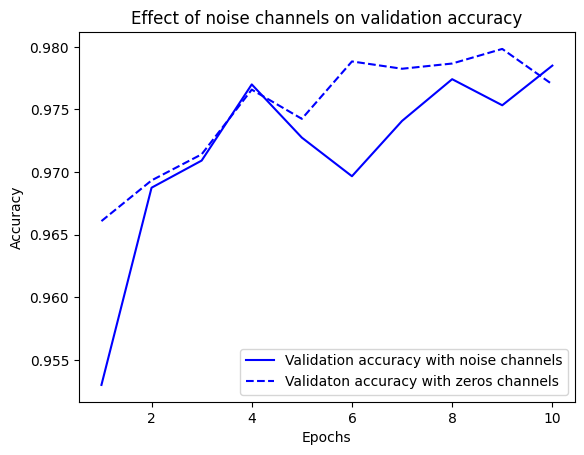

In [ ]:
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-", label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--", label="Validaton accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

5-4 랜덤하게 섞은 레이블로 MNIST 모델 훈련하기

In [ ]:
(train_images, train_labels), _= mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32") / 225

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(train_images, random_train_labels,
          epochs=100, batch_size=128, validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 5s 11ms/step - loss: 2.3189 - accuracy: 0.1010 - val_loss: 2.3037 - val_accuracy: 0.1085
Epoch 2/100
375/375 [==============================] - 3s 9ms/step - loss: 2.3002 - accuracy: 0.1175 - val_loss: 2.3097 - val_accuracy: 0.1041
Epoch 3/100
375/375 [==============================] - 4s 10ms/step - loss: 2.2922 - accuracy: 0.1256 - val_loss: 2.3185 - val_accuracy: 0.1046
Epoch 4/100
375/375 [==============================] - 7s 18ms/step - loss: 2.2797 - accuracy: 0.1373 - val_loss: 2.3236 - val_accuracy: 0.1023
Epoch 5/100
375/375 [==============================] - 4s 12ms/step - loss: 2.2628 - accuracy: 0.1528 - val_loss: 2.3387 - val_accuracy: 0.0993
Epoch 6/100
375/375 [==============================] - 4s 11ms/step - loss: 2.2421 - accuracy: 0.1663 - val_loss: 2.3542 - val_accuracy: 0.1020
Epoch 7/100
375/375 [==============================] - 6s 15ms/step - loss: 2.2165 - accuracy: 0.1784 - val_loss: 2.3685 - val_accuracy: 

## 5.2 머신러닝 모델 평가

5-5 홀드아웃 검증 구현 예

In [ ]:
# num_validation_samples = 10000
# np.random.shuffle(data)
# validation_data = data[:num_validation_samples]
# training_data = data[num_validation_samples:]
# # 모델을 튜닝, 훈련, 평가하는 과정 반복
# model = get_model()
# model.fit(training_data)
# model.fit(np.concatenate([training_data, validation_data]), ...)
# test_score = model.evaluate(test_data, ...)

5-6 k-겹 교차 검증 구현 예
*cf) 사이킷런의 cross_validate를 이용하여 쉽게 구현 가능*

In [ ]:
# from numpy.random.mtrand import f
# k=3
# num_validation_samples = len(data)//k
# np.random.shuffle(data)
# validation_scores = []

# for fold in range(k):
#   validation_data = data[num_validation_samples * fold : num_validation_samples * (fold+1)]
#   training_data = np.concantentate(
#       data[:num_validation_samples * fold], data[num_validation_samples * (fold+1):]
#   )
#   model = get_model()
#   model.fit(training_data, ...)
#   validation_score = model.evaluate(validation_data, ...)
#   validation_scores.append(validation_score)

# validation_scaore = np.average(validation_scores)
# model = get_model()
# model.fit(data, ...)
# test_score = model.evaluate(test_data, ...)

## 5.3 훈련 성능 향상하기

5-7 잘못된 높은 학습률로 MNIST 모델 훈련하기

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(train_images, train_labels,
          epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 6s 12ms/step - loss: 553.1764 - accuracy: 0.3624 - val_loss: 2.1260 - val_accuracy: 0.2347
Epoch 2/10
375/375 [==============================] - 4s 11ms/step - loss: 2.7361 - accuracy: 0.2035 - val_loss: 2.8854 - val_accuracy: 0.2134
Epoch 3/10
375/375 [==============================] - 4s 11ms/step - loss: 2.6296 - accuracy: 0.1847 - val_loss: 2.5801 - val_accuracy: 0.1436
Epoch 4/10
375/375 [==============================] - 4s 12ms/step - loss: 2.4292 - accuracy: 0.1813 - val_loss: 2.3629 - val_accuracy: 0.2153
Epoch 5/10
375/375 [==============================] - 6s 15ms/step - loss: 2.4418 - accuracy: 0.2145 - val_loss: 2.1990 - val_accuracy: 0.2488
Epoch 6/10
375/375 [==============================] - 7s 20ms/step - loss: 2.5522 - accuracy: 0.2289 - val_loss: 2.0654 - val_accuracy: 0.2632
Epoch 7/10
375/375 [==============================] - 7s 20ms/step - loss: 2.4458 - accuracy: 0.2239 - val_loss: 2.2757 - val_accuracy: 0.19

5-8 같은 모델로 적절한 학습률로 훈련하기

In [9]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(train_images, train_labels,
          epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 6s 13ms/step - loss: 0.3738 - accuracy: 0.9110 - val_loss: 0.1428 - val_accuracy: 0.9582
Epoch 2/10
375/375 [==============================] - 5s 13ms/step - loss: 0.1242 - accuracy: 0.9651 - val_loss: 0.1397 - val_accuracy: 0.9652
Epoch 3/10
375/375 [==============================] - 6s 17ms/step - loss: 0.0951 - accuracy: 0.9745 - val_loss: 0.1832 - val_accuracy: 0.9620
Epoch 4/10
375/375 [==============================] - 9s 23ms/step - loss: 0.0831 - accuracy: 0.9786 - val_loss: 0.1522 - val_accuracy: 0.9705
Epoch 5/10
375/375 [==============================] - 6s 15ms/step - loss: 0.0712 - accuracy: 0.9822 - val_loss: 0.1678 - val_accuracy: 0.9712
Epoch 6/10
375/375 [==============================] - 7s 19ms/step - loss: 0.0599 - accuracy: 0.9849 - val_loss: 0.2361 - val_accuracy: 0.9636
Epoch 7/10
375/375 [==============================] - 7s 19ms/step - loss: 0.0490 - accuracy: 0.9877 - val_loss: 0.1719 - val_accuracy: 0.9737

5-9 MNIST 데이터를 사용한 간단한 로지스틱 회귀 모델

불충분한 모델

In [11]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history_small_model = model.fit(
    train_images, train_labels,
    epochs=20, batch_size=128, validation_split=0.2
)

Epoch 1/20
375/375 [==============================] - 5s 11ms/step - loss: 0.6768 - accuracy: 0.8320 - val_loss: 0.3611 - val_accuracy: 0.9023
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3528 - accuracy: 0.9029 - val_loss: 0.3115 - val_accuracy: 0.9140
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 0.3178 - accuracy: 0.9118 - val_loss: 0.2938 - val_accuracy: 0.9179
Epoch 4/20
375/375 [==============================] - 2s 6ms/step - loss: 0.3018 - accuracy: 0.9160 - val_loss: 0.2835 - val_accuracy: 0.9218
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.2921 - accuracy: 0.9188 - val_loss: 0.2794 - val_accuracy: 0.9216
Epoch 6/20
375/375 [==============================] - 2s 4ms/step - loss: 0.2853 - accuracy: 0.9206 - val_loss: 0.2763 - val_accuracy: 0.9249
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.2804 - accuracy: 0.9218 - val_loss: 0.2752 - val_accuracy: 0.9227
Epoch

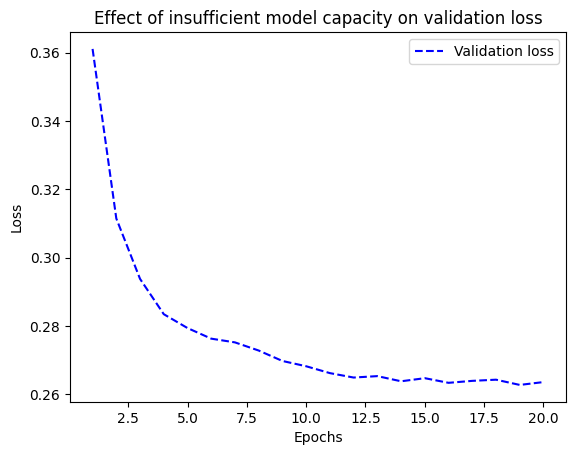

In [12]:
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--", label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

용량이 더 큰 모델

In [14]:
model = keras.Sequential([layers.Dense(96, activation="relu"),
                          layers.Dense(96, activation="relu"),
                          layers.Dense(10, activation="softmax")])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history_small_model = model.fit(
    train_images, train_labels,
    epochs=20, batch_size=128, validation_split=0.2
)

Epoch 1/20
375/375 [==============================] - 2s 5ms/step - loss: 0.3710 - accuracy: 0.8945 - val_loss: 0.1978 - val_accuracy: 0.9429
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1701 - accuracy: 0.9493 - val_loss: 0.1554 - val_accuracy: 0.9550
Epoch 3/20
375/375 [==============================] - 3s 9ms/step - loss: 0.1203 - accuracy: 0.9643 - val_loss: 0.1244 - val_accuracy: 0.9631
Epoch 4/20
375/375 [==============================] - 3s 8ms/step - loss: 0.0927 - accuracy: 0.9724 - val_loss: 0.1055 - val_accuracy: 0.9685
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0739 - accuracy: 0.9775 - val_loss: 0.1007 - val_accuracy: 0.9702
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0608 - accuracy: 0.9816 - val_loss: 0.0997 - val_accuracy: 0.9699
Epoch 7/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0498 - accuracy: 0.9847 - val_loss: 0.1003 - val_accuracy: 0.9700
Epoch 

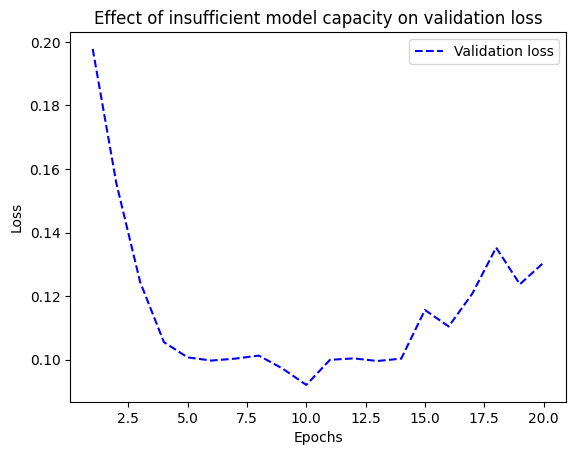

In [15]:
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--", label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## 5.4 일반화 성능 향상하기

5-10 원본 모델

In [16]:
from tensorflow.keras.datasets import imdb

In [18]:
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
train_data = vectorize_sequences(train_data)

In [19]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 88ms/step - loss: 0.5423 - accuracy: 0.7573 - val_loss: 0.4259 - val_accuracy: 0.8342
Epoch 2/20
30/30 [==============================] - 2s 54ms/step - loss: 0.3396 - accuracy: 0.8911 - val_loss: 0.3192 - val_accuracy: 0.8870
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2511 - accuracy: 0.9200 - val_loss: 0.2918 - val_accuracy: 0.8877
Epoch 4/20
30/30 [==============================] - 2s 81ms/step - loss: 0.2008 - accuracy: 0.9340 - val_loss: 0.2865 - val_accuracy: 0.8860
Epoch 5/20
30/30 [==============================] - 4s 124ms/step - loss: 0.1650 - accuracy: 0.9465 - val_loss: 0.2767 - val_accuracy: 0.8921
Epoch 6/20
30/30 [==============================] - 2s 56ms/step - loss: 0.1398 - accuracy: 0.9552 - val_loss: 0.2853 - val_accuracy: 0.8886
Epoch 7/20
30/30 [==============================] - 3s 99ms/step - loss: 0.1175 - accuracy: 0.9649 - val_loss: 0.3041 - val_accuracy: 0.8826
Epoch 8/20
3

5-11 작은 용량의 모델

In [21]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_smaller_model = model.fit(
    train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4
)

Epoch 1/20
30/30 [==============================] - 4s 76ms/step - loss: 0.6379 - accuracy: 0.6193 - val_loss: 0.5829 - val_accuracy: 0.6896
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.5402 - accuracy: 0.7769 - val_loss: 0.5295 - val_accuracy: 0.7860
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.4875 - accuracy: 0.8451 - val_loss: 0.5034 - val_accuracy: 0.8028
Epoch 4/20
30/30 [==============================] - 1s 47ms/step - loss: 0.4509 - accuracy: 0.8790 - val_loss: 0.4784 - val_accuracy: 0.8687
Epoch 5/20
30/30 [==============================] - 2s 54ms/step - loss: 0.4222 - accuracy: 0.9033 - val_loss: 0.4639 - val_accuracy: 0.8638
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3974 - accuracy: 0.9194 - val_loss: 0.4520 - val_accuracy: 0.8802
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3753 - accuracy: 0.9345 - val_loss: 0.4455 - val_accuracy: 0.8729
Epoch 8/20
30

5-12 큰 용량의 모델

In [24]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4
)

Epoch 1/20
30/30 [==============================] - 19s 601ms/step - loss: 0.5669 - accuracy: 0.7326 - val_loss: 0.3444 - val_accuracy: 0.8610
Epoch 2/20
30/30 [==============================] - 20s 690ms/step - loss: 0.3388 - accuracy: 0.8576 - val_loss: 0.3493 - val_accuracy: 0.8539
Epoch 3/20
30/30 [==============================] - 17s 561ms/step - loss: 0.2317 - accuracy: 0.9067 - val_loss: 0.7794 - val_accuracy: 0.7135
Epoch 4/20
30/30 [==============================] - 17s 575ms/step - loss: 0.1909 - accuracy: 0.9294 - val_loss: 0.4371 - val_accuracy: 0.8407
Epoch 5/20
30/30 [==============================] - 18s 604ms/step - loss: 0.1541 - accuracy: 0.9414 - val_loss: 0.3809 - val_accuracy: 0.8619
Epoch 6/20
30/30 [==============================] - 15s 516ms/step - loss: 0.1044 - accuracy: 0.9641 - val_loss: 0.3442 - val_accuracy: 0.8777
Epoch 7/20
30/30 [==============================] - 15s 505ms/step - loss: 0.0952 - accuracy: 0.9661 - val_loss: 0.3057 - val_accuracy: 0.8819

5-13 모델에 L2 가중치 추가하기

In [25]:
from tensorflow.keras import regularizers

In [27]:
model = keras.Sequential([
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_l2_reg = model.fit(
    train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4
)

Epoch 1/20
30/30 [==============================] - 5s 133ms/step - loss: 0.6339 - accuracy: 0.7685 - val_loss: 0.4887 - val_accuracy: 0.8669
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.4251 - accuracy: 0.8835 - val_loss: 0.4111 - val_accuracy: 0.8734
Epoch 3/20
30/30 [==============================] - 2s 55ms/step - loss: 0.3501 - accuracy: 0.9044 - val_loss: 0.4150 - val_accuracy: 0.8615
Epoch 4/20
30/30 [==============================] - 2s 59ms/step - loss: 0.3110 - accuracy: 0.9213 - val_loss: 0.3711 - val_accuracy: 0.8814
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2903 - accuracy: 0.9262 - val_loss: 0.3607 - val_accuracy: 0.8871
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2745 - accuracy: 0.9329 - val_loss: 0.3651 - val_accuracy: 0.8849
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2599 - accuracy: 0.9410 - val_loss: 0.4292 - val_accuracy: 0.8618
Epoch 8/20
3

5-14 케라스에서 사용할수 있는 가중치 규제

In [28]:
from tensorflow.keras import regularizers

In [29]:
regularizers.l1(0.001)  # L1 규제
regularizers.l1_l2(l1=0.001, l2=0.001)  # L1규제와 L2규제 병행

5-15 IMDB 모델에 드롭아웃 추가하기

In [30]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4
)

Epoch 1/20
30/30 [==============================] - 6s 128ms/step - loss: 0.6171 - accuracy: 0.6625 - val_loss: 0.4765 - val_accuracy: 0.8416
Epoch 2/20
30/30 [==============================] - 2s 68ms/step - loss: 0.4751 - accuracy: 0.7938 - val_loss: 0.3575 - val_accuracy: 0.8730
Epoch 3/20
30/30 [==============================] - 2s 59ms/step - loss: 0.3932 - accuracy: 0.8405 - val_loss: 0.3119 - val_accuracy: 0.8852
Epoch 4/20
30/30 [==============================] - 2s 65ms/step - loss: 0.3387 - accuracy: 0.8737 - val_loss: 0.2951 - val_accuracy: 0.8839
Epoch 5/20
30/30 [==============================] - 2s 80ms/step - loss: 0.2982 - accuracy: 0.8901 - val_loss: 0.2754 - val_accuracy: 0.8894
Epoch 6/20
30/30 [==============================] - 2s 72ms/step - loss: 0.2540 - accuracy: 0.9079 - val_loss: 0.2773 - val_accuracy: 0.8918
Epoch 7/20
30/30 [==============================] - 2s 66ms/step - loss: 0.2250 - accuracy: 0.9229 - val_loss: 0.2835 - val_accuracy: 0.8912
Epoch 8/20
3